# Ecuaciones diferenciales (continuación)

### Ejercicio: Filtro Low-Pass

Las ecuaciones son

$$
V_{in}-V_{out}=IR, Q=CV_{out}, I=\frac{dQ}{dt}
$$

De forma equivalente tenemos entonces:

$$
\frac{dV_{out}}{dt} = \frac{1}{RC} (V_{in}-V_{out})
$$

$$
V_{in} =
\left\{
\begin{array}{ll}
      1  & \mathrm{si}\, floor(2t)\, \mathrm{es\, par}\\
      -1 & \\
\end{array} 
\right.
$$

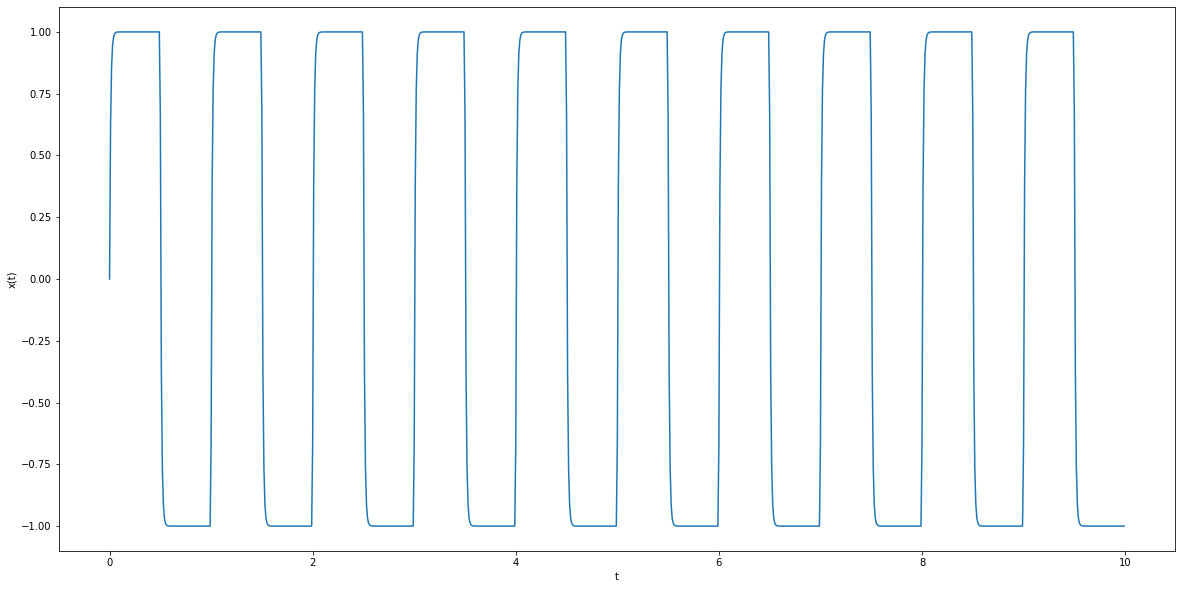

In [14]:
# Ejercicio:Filtro-LowPass
from pylab import *
rcParams['figure.figsize'] = [20, 10]

RC=0.01
def V_in(t):
    if int(2*t)%2==0:
        return 1
    else:
        return -1

def f(Vout,t):
    return (V_in(t)-Vout)/RC

a,b=0.0,10.0
N=1000
h=(b-a)/N
x=0.0
tpoints=arange(a,b,h)
xpoints=[]

for t in tpoints:
    xpoints.append(x)
    k1=h*f(x,t)
    k2=h*f(x+0.5*k1,t+0.5*h)
    k3=h*f(x+0.5*k2,t+0.5*h)
    k4=h*f(x+k3,t+h)
    x+=(k1+2*k2+2*k3+k4)/float(6)
plot(tpoints,xpoints)
xlabel('t')
ylabel('x(t)')
show()

## Ecuaciones Diferenciales de segundo orden

Consideremos el caso más simple, donde sólo dependemos de la variable x. La forma general de la ecuación es:
$$\frac{d^2x}{dt^2}=f(x,\frac{dx}{dt},t)$$
donde $f$ es una función arbitraria.
El truco es plantear otra variable $y=\frac{dx}{dt}$, tal que el sistema se reduzca a un sistema de dos ecuaciones lineales acopladas:
$$
\frac{dx}{dt}=y\\
\frac{dy}{dt}=f(x,y,t)
$$

In [15]:
from ODEsolutions import sol_System_ODE

### Caida libre

### ejercicio

Escribir expresion para un objeto que se suelta una altura $h$. Completar el código para plotear también la expresión analítica.

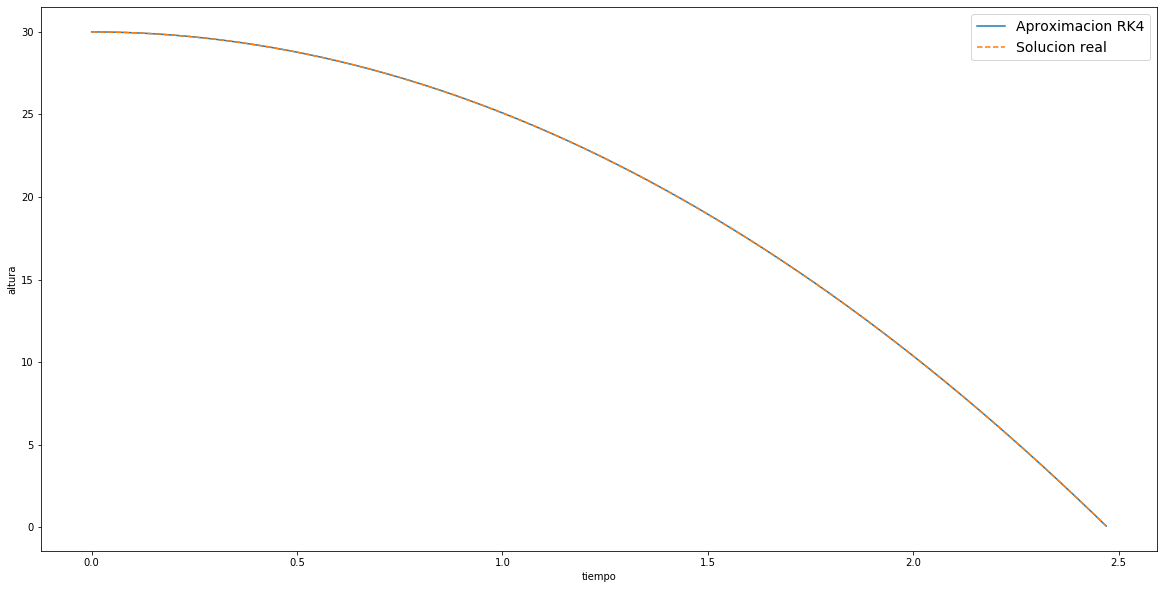

In [16]:
g=9.81
def f(r,t):
    return np.array([r[1],-g],float)

t,r = sol_System_ODE(f,(0,10),(30,0),1000,method='RK4')
mask = r[0,:]>0
y1=r[0,:]
y = y1[mask]

def sol_analitica(t):
    return -.5*g*t**2+30

tp = t[0:len(y)]

plot(tp,y,label='Aproximacion RK4')
plot(tp,sol_analitica(tp),'--',label='Solucion real')
xlabel('tiempo')
ylabel('altura')
legend()

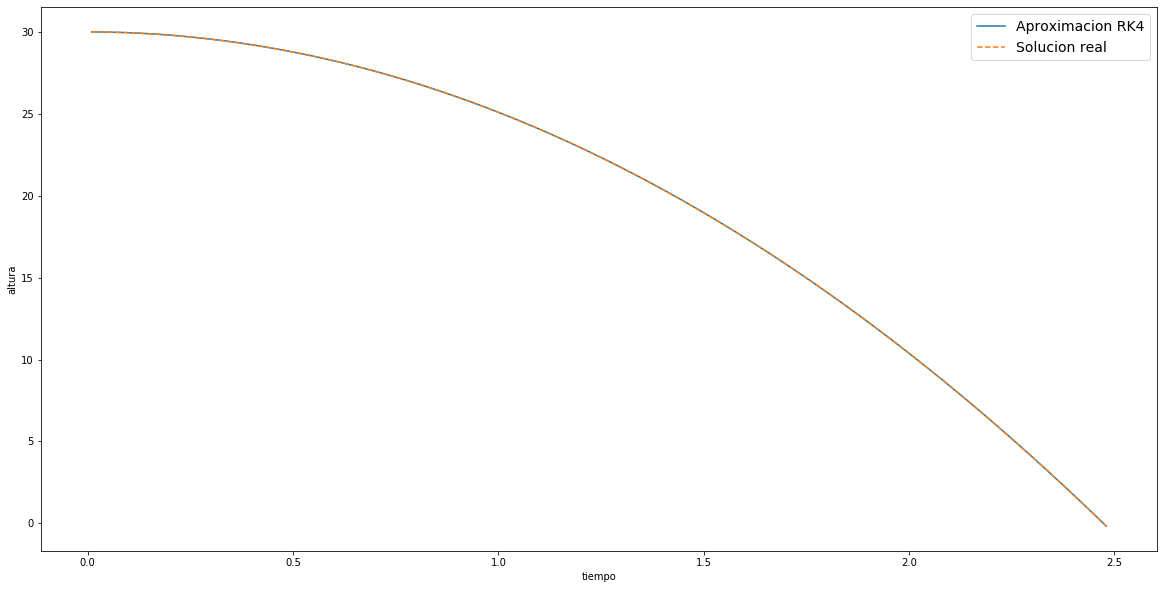

In [17]:
from pylab import *
g=9.81

def f(r,t):
    fx=r[1]
    fv=-g
    return array([fx,fv],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

lista_v=[]
lista_x = []
lista_t = []
t=0
r=([30.,0.]) #cond inicial
while r[0]>0.0:
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/6.
    t+=h
    lista_x.append(r[0])
    lista_v.append(r[1])
    lista_t.append(t)
    
def sol_analitica(t):
    return -.5*g*t**2+30



plot(lista_t,lista_x,label='Aproximacion RK4')
plot(np.array(lista_t),sol_analitica(np.array(lista_t)),'--',label='Solucion real')
xlabel('tiempo')
ylabel('altura')
legend()
show()

### Péndulo no lineal
El desplazamiento del brazo en la posición vertical está dado en términos de $\theta$ y su dirección tangencial es $l\frac{d^2\theta}{dt^2}$.

$$
ml\frac{d^2\theta}{dt^2} = -mg sin(\theta)
$$

$$
\frac{d^2\theta}{dt^2} = -\frac{g}{l} sin(\theta)
$$

Expresando la ecuación de segundo órden como dos ecuaciones diferenciales de primer órden.

$$
\frac{d\theta}{dt} = \omega
$$

$$
\frac{d\omega}{dt} = -\frac{g}{l}sin\theta
$$


### ejercicio:
Implementa en el código de abajo la f correspondiente para resolver numericamente el péndulo no lineal

In [18]:
from ipywidgets import interact

In [19]:
g=9.81
l=0.1
@interact(initial_ang=179/180 * np.pi)
def param_sol(initial_ang):
    def f(r,t):
        theta=r[0]
        omega=r[1]
        ftheta=omega
        fomega=-g*sin(theta)/l
        return array([ftheta,fomega],float)

    t,r = sol_System_ODE(f,(0,10),[initial_ang,0],1000,method='RK4')
    theta = r[0,:]
    plot(t,theta)

interactive(children=(FloatSlider(value=3.12413936106985, description='initial_ang', max=9.37241808320955, min…

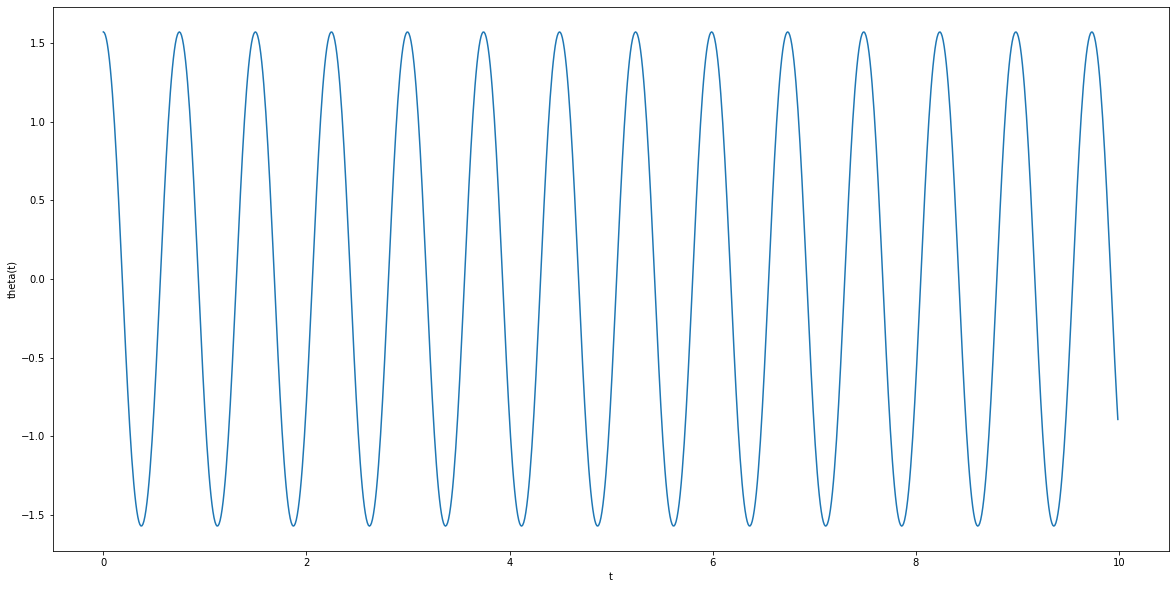

In [20]:
g=9.81
l=0.1
angulo_inicial= np.pi/2

def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=-g*sin(theta)/l
    return array([ftheta,fomega],float)
    return array([ftheta,fomega],float)

a = 0.0
b = 10.0
N = 1000
h = (b-a)/N

lista_t = arange(a,b,h)
lista_theta = []

r = array([angulo_inicial,0],float)
for t in lista_t:
    lista_theta.append(r[0])
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    k3=h*f(r+0.5*k2,t+0.5*h)
    k4=h*f(r+k3,t+h)
    r+=(k1+2*k2+2*k3+k4)/6.

plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

# Método leapfrog

Considerando la expresión general para la ecuación diferencial de primer orden de una sóla variable:

$$
\frac{dx}{dt} = f(x,t)
$$

Expresamos a Runge-Kutta de segundo órden de la siguiente manera:

$$
x(t+\frac{1}{2}h) = x(t) + \frac{1}{2}hf(x,t)\\
x(t+h)=x(t)+hf(x(t+\frac{1}{2}h),t+\frac{1}{2}h)
$$

Pero ahora en vez de calcular el punto medio de $x(t+h)$ lo calculamos del previo punto medio $x(t+\frac{1}{2}h)$, en términos matemáticos:

$$
x(t+\frac{3}{2}h) = x(t+\frac{1}{2}h) + hf(x(t+h),t+h)\\
$$
Leapfrog es una variante de esta idea calculamos los valores con índice semi entero del valor previo.

$$
x(t+2h) = x(t+h) + hf(x(t+\frac{3}{2}h),t+\frac{3}{2}h)\\
$$

De esta manera podemos obtener las expresiones sobre las cuales podemos iterar.

$$
x(t+h) = x(t) + hf(x(t+\frac{1}{2}h),t+\frac{1}{2}h)\\
x(t+\frac{3}{2}h) = x(t+\frac{1}{2}h) + hf(x(t+h),t+h)\\
$$

Podemos generalizar a ecuaciones diferenciales simultaneas pasando de $x$ a  $\mathbf{r}$ y de una función $f$ a la función vectorial $\mathbf{f}$

$$
\mathbf{r}(t+h) = \mathbf{r}(t) + h\mathbf{f}(\mathbf{r}(t+\frac{1}{2}h),t+\frac{1}{2}h)\\
\mathbf{r}(t+\frac{3}{2}h) = \mathbf{r}(t+\frac{1}{2}h) + h\mathbf{f}(\mathbf{r}(t+h),t+h)\\
$$

Si bien Runge-Kutta de cuarto órden es mejor y no implica demasiado esfuerzo implementarlo, leap frog tiene propiedades interesantes. Por ejemplo es simétrico con respecto a inversión temporal. $\Longrightarrow$ Para sistemas físicos, conserva energía....!!!!

Para ver esto hacemos pasos para atrás en el tiempo desde un punto adelante. Es decir usamos $-h$ a un tiempo $t+\frac{3}{2}h$.

Usando primero $-h$
$$
x(t-h) = x(t) - hf(x(t-\frac{1}{2}h),t-\frac{1}{2}h)\\
x(t-\frac{3}{2}h) = x(t-\frac{1}{2}h) + hf(x(t-h),t-h)\\
$$

Ahora evualuando en $t+\frac{3}{2}h$.

$$
x(t+\frac{1}{2}h) = x(t+\frac{3}{2}h) - hf(x(t+h),t+h)\\
x(t) = x(t+h) - hf(x(t+\frac{1}{2}h),t+\frac{1}{2}h)\\
$$



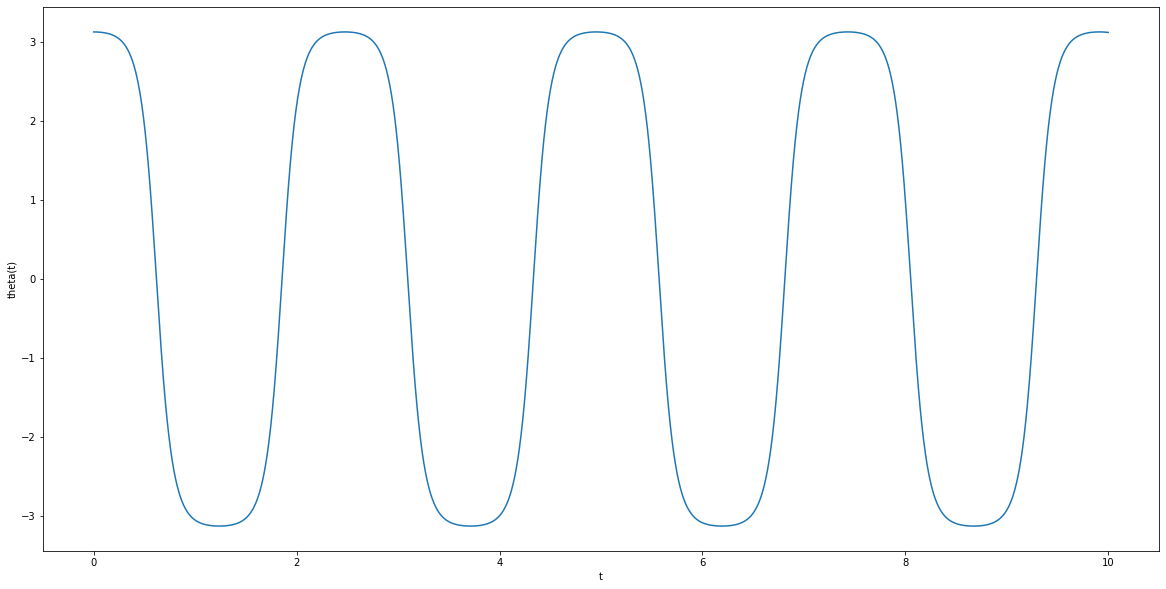

In [21]:
#Runge-Kutta orden 2 pendulo
g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 10.0
N = 10000
h = (b-a)/N

lista_t = arange(a,b,h)
lista_theta = []
    
r = array([179/180*pi,0],float)
for t in lista_t:
    lista_theta.append(r[0])
    k1=h*f(r,t)
    k2=h*f(r+0.5*k1,t+0.5*h)
    r+=k2

plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

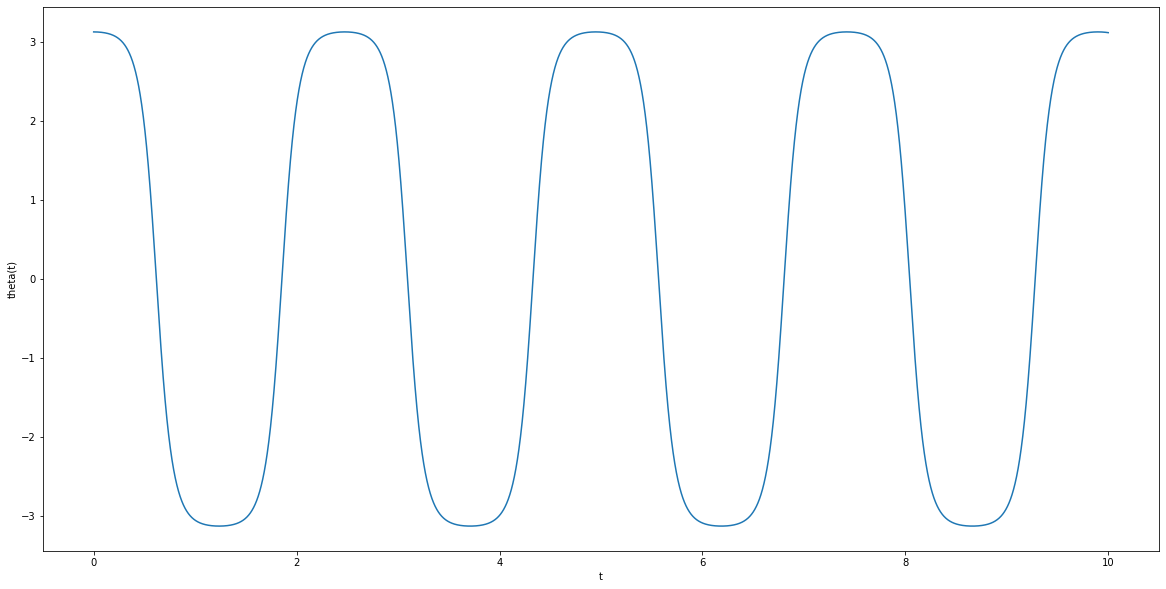

In [22]:
g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 10.0
N = 10000
initial_ang = 179/180*pi

t,r = sol_System_ODE(f,(a,b),[initial_ang,0],N,method='leap_frog')
theta = r[0,:]
plot(t,theta)
xlabel('t')
ylabel('theta(t)')
show()

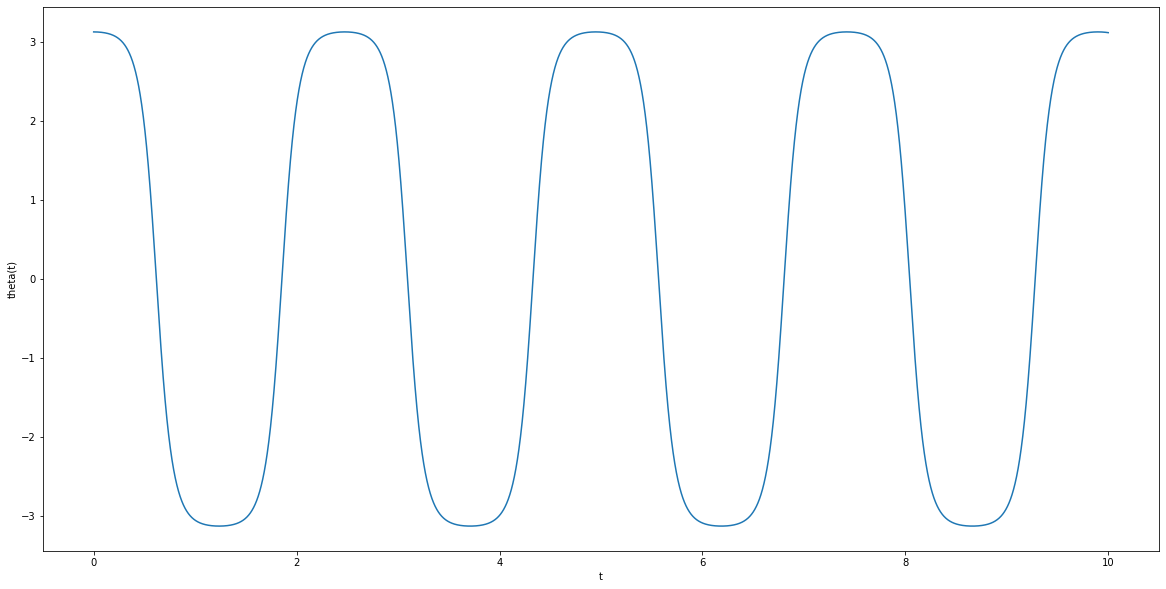

In [23]:
#Runge-Kutta orden 2 pendulo 2
#Modificar esto para implementar leapfrog
g=9.81
l=0.1
def f(r,t):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=(-g/l)*sin(theta)
    return array([ftheta,fomega],float)

a = 0.0
b = 10.0
N = 10000
h = (b-a)/N

lista_t = arange(a,b,h)
lista_theta = []

r = array([179/180*pi,0],float)
v=r+0.5*h*f(r,lista_t[0])
for t in lista_t:
    lista_theta.append(r[0])
    v = v + h*f(r,t)
    r = r + f(v,t+0.5*h)*h

plot(lista_t,lista_theta)
xlabel('t')
ylabel('theta(t)')
show()

### Oscilador forzado amortiguado

Tenemos la siguiente ecuación:

$$
\frac{d^2x}{dt^2}+\gamma\frac{dx}{dt}+\omega_0^2x = \frac{F}{m}
$$

Donde $\gamma$ es la constante de amortiguamiento y $\omega_0 = \sqrt{k}{m}$

### ejercicio

Escribe esta ecuación de segundo orden en terminos de 2 ecuaciones de primer orden

# AQUI


$y_1^{'} = y_2$

$y_2^{'} = \frac{F}{m} - w_0^2y_1 - \gamma y_2 $

con $y_1 = x, y_2 = \dot{x}$

Recordemos que la energía el oscilador armónico es:

$$
E= \frac{1}{2}mv^2+\frac{1}{2}kx^2
$$

### ejercicio

Implementa una función que use el metodo leapfrog para el caso de m=k=1 con fuerza externa $F=0$, pocición inicial $x_{0}=0, v_{0}=1$ variando $\gamma=0, 0.01, 0.1$. Y grafica la posición y energía en función del tiempo.

Se sabe que en sistemas oscilatorios de este tipo se tiene un **factor de amortiguamiento crítico** en el que el sistema no oscila en absoluto y decae lo más rápido posible a amplitud cero. 

Este factor crítico es $C_c = 2\sqrt{km}$ 

Como tenemos m=k=1 entonces el factor critico es 2 que corresponde con gamma = 2

Tambien se muestra el caso de **movimiento armonico simple** con gamma = 0 en que no hay perdida de energía y la amplitud se mantiene.

Otro caso es el **sobreamortiguado con gamma = 4** en el que el sistema no oscila igual que en el caso crítico pero decae a equilibrio más lentamente que en caso crítico.

Finalmente un caso **subamortiguado con gamma = 0.01** en el que sistema deace extremadamente rapido al equilibro pero sobrreacciona y lo cursa de nueva hacia la otra dicrección de oscilación y así sucesivamente con una amplitud decreciente con el tiempo.

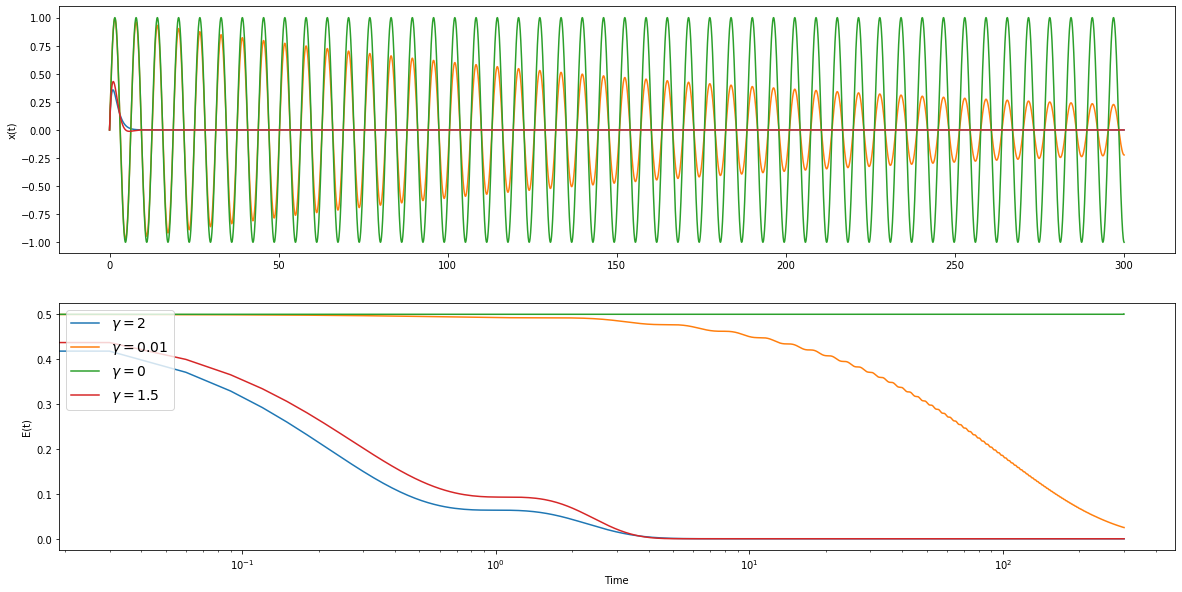

In [24]:
from pylab import *

N = 10000
t = linspace(0,300,N)
dt = t[1] - t[0]


def leapfrog(F,x0,v0,gamma):
    x = zeros(N)
    v = zeros(N)
    E = zeros(N)    


    x[0] = x0
    v[0] = v0


    fac1 = 1.0 - 0.5*gamma*dt
    fac2 = 1.0/(1.0 + 0.5*gamma*dt)

    for i in arange(N-1):
        #Aqui va tu codigo de leapfrog
        v[i + 1] = fac1*fac2*v[i] - fac2*dt*x[i] + fac2*dt*F[i]
        x[i + 1] = x[i] + dt*v[i + 1]
        E[i] += 0.5*(x[i]**2 + ((v[i] + v[i+1])/2.0)**2)

    E[-1] = 0.5*(x[-1]**2 + v[-1]**2)

    return x,v,E


F = zeros(N)
x1,v1,E1 = leapfrog(F,0.0,1.0,2) # x0 = 0.0, v0 = 1.0, gamma = 2
x2,v2,E2 = leapfrog(F,0.0,1.0,0.01) # x0 = 0.0, v0 = 1.0, gamma = 0.01
x3,v3,E3 = leapfrog(F,0.0,1.0,0.0) # x0 = 0.0, v0 = 1.0, gamma = 0
x4,v4,E4 = leapfrog(F,0.0,1.0,1.5) # x0 = 0.0, v0 = 1.0, gamma = 4


figure()
subplot(211)
plot(t,x1)
plot(t,x2)
plot(t,x3)
plot(t,x4)
ylabel("x(t)")

subplot(212)
plot(t,E1,label=r"$\gamma = 2$")
plot(t,E2,label=r"$\gamma = 0.01$")
plot(t,E3,label=r"$\gamma = 0$")
plot(t,E4,label=r"$\gamma = 1.5$")
ylabel("E(t)")
xscale('log')

xlabel("Time")
rcParams['legend.fontsize'] = 14.0
legend(loc="upper left")

show()

### ejercicio

Ahora supongamos que la fuerza tiene la forma:

$$
F=F_0cos(\omega t)e^(\frac{-t^2}{T^2})
$$

Grafica la posición y la energía como función del tiempo, con $\gamma=0.1$ usando $\omega$ como $\omega_0$, $0.8\omega_0$ y $0.9\omega_0$. $F_0=1$ y $T=10$, describe lo que sucede mientras varias $\omega$.

In [25]:
@interact(w=(.2,1,.1))

def input_outputSystem(w):
    def fuerza(f0,t,w,T):
        return f0*cos(w*t)*exp(-t**2/T**2) 
    
    fig,axs = plt.subplots(3,1)

    axs[0].plot(t,fuerza(1,t-150,w,50))
    
    
    F1 = zeros(N)
    F2 = zeros(N)
    F3 = zeros(N)
    for i in range(N-1):
        F1[i] = fuerza(1.0,t[i] - 100.0,w,10.0)
        F2[i] = fuerza(1.0,t[i] - 100.0,w-.1,10.0)
        F3[i] = fuerza(1.0,t[i] - 100.0,w-.2,10.0)

    x1,v1,E1 = leapfrog(F1,0.0,0.0,0.1)
    x2,v2,E2 = leapfrog(F2,0.0,0.0,0.1)
    x3,v3,E3 = leapfrog(F3,0.0,0.0,0.1)

    axs[1].plot(t,x1)
    axs[1].plot(t,x2)
    axs[1].plot(t,x3)
    axs[1].set_ylabel("x(t)")
    axs[1].set_xlabel('TIme')

    axs[2].plot(t,E1,label=f"${w:.2f}\omega_0$")
    axs[2].plot(t,E2,label=f"${w-.1:.2f}\omega_0$")
    axs[2].plot(t,E3,label=f"${w-.2:.2f}\omega_0$")
    axs[2].set_ylabel("E(t)")

    axs[2].set_xlabel("Time")
    axs[2].legend()
    

interactive(children=(FloatSlider(value=0.6000000000000001, description='w', max=1.0, min=0.2), Output()), _do…

Podemos observar el comportamiento de la fuerza que modula y notamos que la forma de pulso del input modula el output del sistema. Tambien se puede ver una relacion de proporcionalidad directa entre la frecuencia  $\omega_0$ y la amplitud de la solucion. La energia tambien exhibe el comportamiento de pulso del input. 